class: 0            prob: 0.0015
class: 1            prob: 0.993
class: 2            prob: 0.00058
class: 3            prob: 0.000448
class: 4            prob: 0.00284
class: 5            prob: 0.000831
class: 6            prob: 4.43e-05
class: 7            prob: 0.000267
class: 8            prob: 9.69e-06
class: 9            prob: 5.17e-05


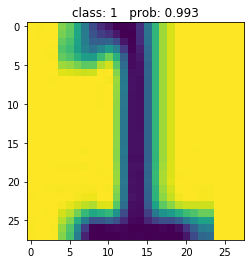

In [8]:
import os
import json

import cv2
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

from model import resnet34


def main():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#     device = torch.device("cpu")
    data_transform = transforms.Compose(
        [transforms.Resize(256),
         transforms.CenterCrop(224),
         transforms.Grayscale(1),
         transforms.ToTensor(),
         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

    # load image
    img_path = "../test/902.jpg"
    assert os.path.exists(img_path), "file: '{}' dose not exist.".format(img_path)
    img = Image.open(img_path)
#     img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    plt.imshow(img)
#     print(len(img.split()) 
    
    # [N, C, H, W]
    img = data_transform(img)
    # expand batch dimension
    img = torch.unsqueeze(img, dim=0)

    # read class_indict
    json_path = './class_indices.json'
    assert os.path.exists(json_path), "file: '{}' dose not exist.".format(json_path)

    with open(json_path, "r") as f:
        class_indict = json.load(f)

    # create model
    model = resnet34(num_classes=10).to(device)

    # load model weights
    weights_path = "./resNet34.pth"
    assert os.path.exists(weights_path), "file: '{}' dose not exist.".format(weights_path)
    model.load_state_dict(torch.load(weights_path, map_location=device))

    # prediction
    model.eval()
    with torch.no_grad():
        # predict class
        output = torch.squeeze(model(img.to(device))).cpu()
        predict = torch.softmax(output, dim=0)
        predict_cla = torch.argmax(predict).numpy()

    print_res = "class: {}   prob: {:.3}".format(class_indict[str(predict_cla)],
                                                 predict[predict_cla].numpy())
    plt.title(print_res)
    for i in range(len(predict)):
        print("class: {:10}   prob: {:.3}".format(class_indict[str(i)],
                                                  predict[i].numpy()))
    plt.show()


if __name__ == '__main__':
    main()